## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [60]:
# Your code here - remember to use markdown cells for comments as well!
%ls

 Volume in drive C is OS
 Volume Serial Number is 9A45-0C78

 Directory of C:\Users\Jake\Documents\Flatiron\Capstone\Capstone-Food-Waste

04/11/2023  03:28 AM    <DIR>          .
04/05/2023  09:20 AM    <DIR>          ..
04/05/2023  12:04 PM    <DIR>          .ipynb_checkpoints
04/11/2023  03:11 AM    <DIR>          Data
04/11/2023  03:28 AM            67,793 First.ipynb
04/05/2023  09:20 AM                21 README.md
               2 File(s)         67,814 bytes
               4 Dir(s)  138,557,640,704 bytes free


In [61]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [62]:
import sqlite3
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

plt.style.use('seaborn-notebook')
import openpyxl

In [63]:
#df = pd.read_csv('data/food-waste-pilot.csv')
df = pd.read_excel('data/importfirst2pop.xlsx')
#df.dropna(how='all', inplace=True)
#df.ffill(inplace=True)
df.fillna(0, inplace=True)
#FoodValue = df['FoodValue']
#FoodValuePercent = df['FoodValue%']
#FoodVolume = df['FoodVolume']
#FoodVolumePercent = df['FoodVolume%']
#Animals = df['Animals']
#Meats = df['Meats']
#Fish = df['Fish']
#Vegetables = df['Vegetables']
#Dairy = df['Dairy']
#Fruits = df['Fruits']
#Nuts = df['Nuts']
#Coffee = df['Coffee']
#Grains = df['Grains']
#VegOils = df['VegOils']
#Sweets = df['Sweets']
#Cocoa = df['Cocoa']
#Other = df['Other']
#Beverages = df['Beverages']
#Prices = df['Prices']

In [64]:
df.round(0)
df.drop('Last 10 years average', axis=1, inplace=True)


(-30.2209447492959, 338289.0)

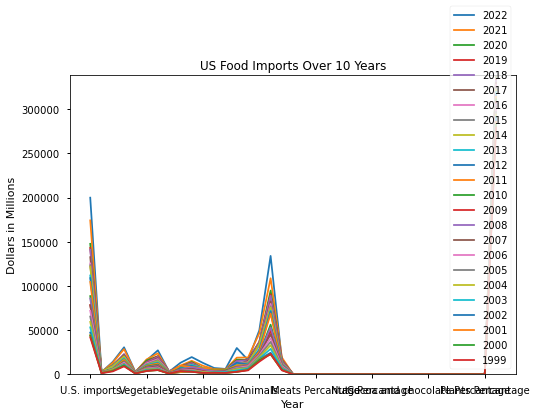

In [65]:
df.set_index('Imports', inplace=True)
df.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Dollars in Millions')
plt.title('US Food Imports Over 10 Years')
plt.ylim(df.min().min(), df.max().max())

In [66]:
df = df[df['1999'] != 0]

In [67]:
df

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
Imports,,,,,,,,,,,,,,,,,,,,,
U.S. imports,199835.8,174144.8,147631.0,142987.4,140916.9,132511.3,125437.8,123350.7,121825.0,111777.7,...,85752.1,77937.8,71925.6,65311.7,59268.3,53102.2,47205.1,44396.4,43788.6,41825.0
Live meat animals,2509.6,2298.9,2158.1,2253.4,2029.4,2016.3,2103.3,2774.9,3009.9,2193.0,...,2277.1,2596.4,2173.9,1673.3,1139.4,1278.0,1725.2,1772.0,1420.3,1190.6
Meats,14055.4,13194.1,10384.6,9668.9,9251.2,8875.2,8587.2,9991.7,8940.3,6529.9,...,5059.8,5367.4,5243.7,5752.0,5718.5,4426.9,4283.5,4256.2,3827.7,3260.5
Fish and shellfish 2/,30525.5,28493.0,21832.2,22469.1,22900.9,21924.9,19638.4,18877.9,20363.3,18059.6,...,13950.5,13466.4,13145.7,11876.4,11138.7,10892.7,10000.9,9697.5,9946.7,8914.4
Dairy,2721.4,2459.5,2140.8,2195.7,2063.1,1876.9,1907.2,1911.5,1871.6,1712.1,...,1622.5,1540.8,1429.5,1404.5,1303.7,1118.7,1013.9,1000.4,925.6,931.4
Vegetables,15754.3,16838.2,15590.3,13974.8,13419.1,12670.5,12409.2,11227.1,10880.9,10687.6,...,7798.4,7254.6,6617.9,6044.3,5735.8,5094.8,4397.7,4160.8,3772.0,3631.8
Fruits,27083.8,23668.8,20492.1,20313.8,19539.3,18384.6,17157.8,15954.8,14807.7,13602.3,...,10064.7,9384.1,7833.2,7003.6,6047.3,5631.4,5138.8,4741.9,4692.2,4827.4
Nuts,2944.8,3157.4,2786.1,3191.0,3502.1,3312.2,2877.9,2776.1,2370.0,2019.4,...,1358.3,1190.8,1100.4,1122.1,1079.7,781.3,740.0,717.0,849.2,833.3
"Coffee, tea, and spices",12980.6,9818.7,8346.2,8427.3,8454.7,9066.7,8311.3,8536.2,8298.8,7633.2,...,5580.8,4791.2,4200.4,3775.7,3148.8,2875.5,2457.8,2403.4,3444.3,3605.9


In [68]:
df = df.T

In [69]:
df

Imports,U.S. imports,Live meat animals,Meats,Fish and shellfish 2/,Dairy,Vegetables,Fruits,Nuts,"Coffee, tea, and spices",Grains,Vegetable oils,Sugar and candy,Cocoa and chocolate,Other edible products,Beverages 3/,Animals,Plants,Beverages 3/,US Population
2022,199835.8,2509.6,14055.4,30525.5,2721.4,15754.3,27083.8,2944.8,12980.6,19470.0,12850.8,7074.8,6055.5,29732.8,16076.5,49811.9,133947.4,16076.5,338289.0
2021,174144.8,2298.9,13194.1,28493.0,2459.5,16838.2,23668.8,3157.4,9818.7,15255.9,9600.8,5877.4,5634.1,18825.4,19022.6,46445.5,108676.7,19022.6,336997.0
2020,147631.0,2158.1,10384.6,21832.2,2140.8,15590.3,20492.1,2786.1,8346.2,13924.5,6682.1,5318.3,5052.4,16554.4,16368.9,36515.7,94746.4,16368.9,335942.0
2019,142987.4,2253.4,9668.9,22469.1,2195.7,13974.8,20313.8,3191.0,8427.3,13035.5,6303.5,4810.1,4977.1,15270.5,16096.7,36587.1,90303.6,16096.7,334319.0
2018,140916.9,2029.4,9251.2,22900.9,2063.1,13419.1,19539.3,3502.1,8454.7,12562.1,6989.2,4803.9,4712.6,14929.3,15760.0,36244.6,88912.3,15760.0,332140.0
2017,132511.3,2016.3,8875.2,21924.9,1876.9,12670.5,18384.6,3312.2,9066.7,11257.6,7216.0,4807.5,5012.6,10871.7,15218.6,34693.3,82599.4,15218.6,329791.0
2016,125437.8,2103.3,8587.2,19638.4,1907.2,12409.2,17157.8,2877.9,8311.3,10558.4,6523.3,4802.9,5080.9,11921.1,13558.9,32236.1,79642.8,13558.9,327210.0
2015,123350.7,2774.9,9991.7,18877.9,1911.5,11227.1,15954.8,2776.1,8536.2,10360.1,6304.1,4829.4,4859.9,12105.3,12841.7,33556.0,76953.0,12841.7,324607.0
2014,121825.0,3009.9,8940.3,20363.3,1871.6,10880.9,14807.7,2370.0,8298.8,10363.7,7336.6,4705.4,4728.6,12134.5,12013.7,34185.1,75626.2,12013.7,322033.0
2013,111777.7,2193.0,6529.9,18059.6,1712.1,10687.6,13602.3,2019.4,7633.2,10584.6,6664.5,4462.9,4159.5,12178.2,11290.9,28494.6,71992.2,11290.9,319375.0


In [70]:
years = []
for year in range(1999, 2023):
    years.append(year)
print(years)

df.drop('US Population', axis=1, inplace=True)

[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


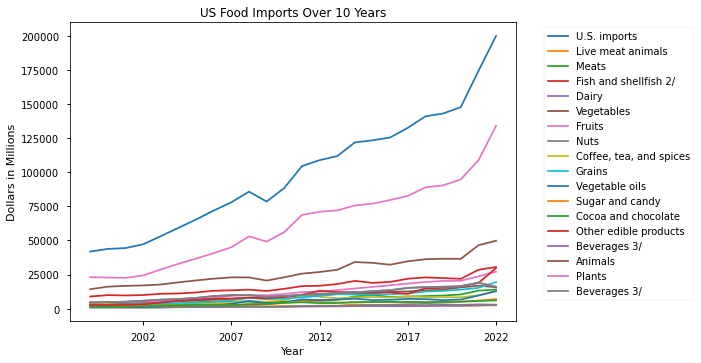

In [71]:
df.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Dollars in Millions')
plt.title('US Food Imports Over 10 Years')
plt.gca().invert_xaxis()
plt.legend(bbox_to_anchor=(1.05, 1))


In [ ]:
plt.bar(df['category'], df['values'])
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Simple Bar Graph')
plt.show()